In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# model is a dummy variable and has 312 values. very hard to implement as a dummy value. therefore we need to drop it

In [5]:
data = raw_data.drop(['Model'], axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# finding the NaN or empty rows

In [6]:
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [7]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

price has 172 and engineV 150 missing values (mv). 
the rule is: if you are missing less than 5%, then you can delete all the row of the missing values.
because we are deleting observacions (rows) we use axis = 0

In [8]:
data_nmv = data.dropna(axis = 0)
data_nmv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [9]:
data_nmv.shape

(4025, 8)

4345 - 4025 = 320 rows were deleted
320/4345 = 7.3% was deleted

In [10]:
data_nmv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


 in the above table we find that Brand and EngineV have a max many times higher than the average (mean). therefore we need 
    to check with the PDF of these two

DEALING WITH OUTLIERS

EXPLORING PDFs


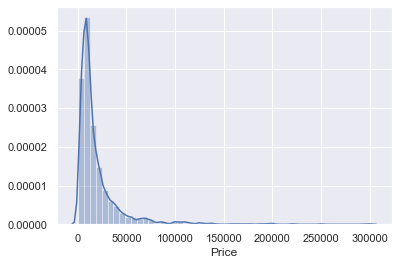

In [11]:
sns.distplot(data_nmv['Price'])

The graphic shows a tail in the right side (high prices)
USUALLY DELETING 1% OF THE TOP WE DROP THE OUTLIERS, then we want to get the 99th percentile and
keep the data below it


In [12]:
q = data_nmv['Price'].quantile(0.99)
data1 = data_nmv[data_nmv['Price'] <q]

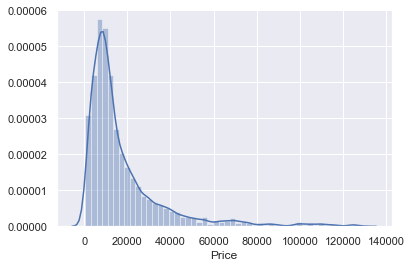

In [13]:
sns.distplot(data1['Price'])

checking EngineV with the PDF

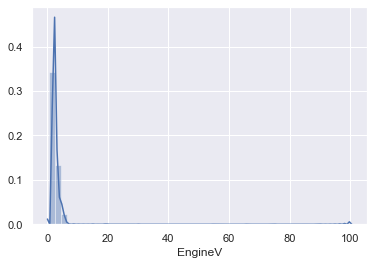

In [14]:
sns.distplot(data1['EngineV'])

THERE IS AN OUTLIER AROUND 100
the EngineV has values of 99.99, this value is incorrect, commercial engines do not have this value. The maximum volume engine is 6.5

In [15]:
data2 = data1[data1['EngineV'] < 6.6]
data2

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


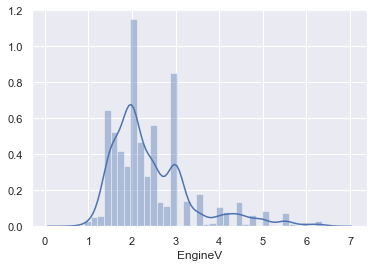

In [16]:
sns.distplot(data2['EngineV'])

In [17]:
data2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3962,3962.000000,3962,3962.000000,3962.000000,3962,3962,3962.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,875,NaN,1517,NaN,NaN,1846,3597,NaN
mean,NaN,17894.989894,NaN,164.934124,2.443728,NaN,NaN,2006.308682
std,NaN,19009.182560,NaN,102.835895,0.946559,NaN,NaN,6.672516
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,93.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21275.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


we do the same with Mileage

In [18]:
q = data2['Mileage'].quantile(0.99)
data3 = data2[data2['Mileage'] <q]

In [19]:
data3.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3922,3922.000000,3922,3922.000000,3922.000000,3922,3922,3922.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1500,NaN,NaN,1818,3560,NaN
mean,NaN,17992.886272,NaN,161.279449,2.444531,NaN,NaN,2006.406425
std,NaN,19041.283610,NaN,96.056020,0.948292,NaN,NaN,6.595079
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


with year the problem if in the left side (low years), very old cars, even 1969

we need to reset the index, because there are 3868 rows and the index goes to 4344

CHECKING OLS ASSUMPTIONS
NOTE: THE DUMMY VARIABLES DO NOT NEED TO COMPLY THE ASSUMPTIONS

BECAUSE THE FIGURES DO NOT SHOW LINEARITY, WE NEED TO TRANSFORM the dependent variable "Price"

In [20]:
data_cleaned = data3.copy()

NO ENDOGENEITY (correlation between error and independent variable), we will check the residuals
after the regression is created

NORMALITY AND HOMOSCEDASTICITY
Normality = is met when we have big sample, as this is the case. Following the CLT (Center Limit Theoreman)

Zero Mean = met the assumption when we include the intercept in the regression

Homoscedasticity = met the assumption according with the graph, the transformation resolved it. transformation generally fix the hetereoscedasticity
 

AUTOCORRELATION
We do not to check this assumption because it is no from time series data or panal data

MULTICOLLINEARITY
Mileage and Year are correlated
we check multicollinearity with stastmodels, using VIF (Variance Inflation Factor)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we create a variable with the independent variables
# VIF = 1/(1-R2), Where R2 is R_square (square of the standard error)

variables = data_cleaned[['Mileage','Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i)for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif 

,VIF,features
0,3.791774,Mileage
1,10.374484,Year
2,7.647392,EngineV


these are the values of VIF without transforming Mileage, Year and EngineV
the only with VIF decrease was EngineV, Therefore in this case the 
log transformation is useless for Mileage and Year

    VIF	Features
0	3.791584	Mileage
1	10.354854	Year
2	7.662068	EngineV


In [22]:
data_cleaned.describe(include ='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3922,3922.000000,3922,3922.000000,3922.000000,3922,3922,3922.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1500,NaN,NaN,1818,3560,NaN
mean,NaN,17992.886272,NaN,161.279449,2.444531,NaN,NaN,2006.406425
std,NaN,19041.283610,NaN,96.056020,0.948292,NaN,NaN,6.595079
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


CATEGORIZING log price because the model to be used is random forest

In [23]:
bins = [600, 2000, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000 ]
names = ['<0.6k', '0.6k-2k', '2k-5k','5k-10k','10k-15k','15k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k', '100k-110k','110k-120k','120k+']

In [24]:
d = dict(enumerate(names, 1))

In [25]:
data_cleaned['Price_Range'] = np.vectorize(d.get)(np.digitize(data_cleaned['Price'], bins))

In [26]:
data_cleaned.describe(include ='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Price_Range
count,3922,3922.000000,3922,3922.000000,3922.000000,3922,3922,3922.000000,3922
unique,7,NaN,6,NaN,NaN,4,2,NaN,16
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,2k-5k
freq,862,NaN,1500,NaN,NaN,1818,3560,NaN,1084
mean,NaN,17992.886272,NaN,161.279449,2.444531,NaN,NaN,2006.406425,NaN
std,NaN,19041.283610,NaN,96.056020,0.948292,NaN,NaN,6.595079,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000,NaN


In [27]:
data_cleaned.drop(['Price'], axis = 1)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Price_Range
0,BMW,sedan,277,2.0,Petrol,yes,1991,0.6k-2k
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,2k-5k
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,5k-10k
3,Audi,crossover,240,4.2,Petrol,yes,2007,15k-20k
4,Toyota,crossover,120,2.0,Petrol,yes,2011,10k-15k
...,...,...,...,...,...,...,...,...
4339,Toyota,sedan,35,1.6,Petrol,yes,2014,10k-15k
4340,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,110k-120k
4341,BMW,sedan,1,3.5,Petrol,yes,1999,2k-5k
4342,BMW,sedan,194,2.0,Petrol,yes,1985,2k-5k


DUMMIES CONVERSION

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le_Price_Range = LabelEncoder()
le_Brand = LabelEncoder()
le_Body = LabelEncoder()
le_Engine_Type = LabelEncoder()
le_Registration = LabelEncoder()


In [30]:
data_cleaned['Price_Range_n'] = le_Price_Range.fit_transform(data_cleaned['Price_Range'])
data_cleaned['Brand_n'] = le_Brand.fit_transform(data_cleaned['Brand'])
data_cleaned['Body_n'] = le_Body.fit_transform(data_cleaned['Body'])
data_cleaned['Engine_Type_n'] = le_Engine_Type.fit_transform(data_cleaned['Engine Type'])
data_cleaned['Registratione_n'] = le_Registration.fit_transform(data_cleaned['Registration'])

In [31]:
data_cleaned = data_cleaned.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Price_Range', 'Price'], axis = 1)

In [32]:
data_cleaned.head()

,Mileage,EngineV,Year,Price_Range_n,Brand_n,Body_n,Engine_Type_n,Registratione_n
0,277,2.0,1991,0,1,3,3,1
1,427,2.9,1999,6,2,5,0,1
2,358,5.0,2003,10,2,3,1,1
3,240,4.2,2007,4,0,0,3,1
4,120,2.0,2011,2,5,0,3,1


In [33]:
data_cleaned.describe(include = 'all')

,Mileage,EngineV,Year,Price_Range_n,Brand_n,Body_n,Engine_Type_n,Registratione_n
count,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000,3922.000000
mean,161.279449,2.444531,2006.406425,5.702448,3.191229,2.567568,1.286588,0.907700
std,96.056020,0.948292,6.595079,3.624274,2.088123,1.650747,1.362398,0.289486
min,0.000000,0.600000,1969.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,1.800000,2003.000000,4.000000,1.000000,1.000000,0.000000,1.000000
50%,158.000000,2.200000,2008.000000,6.000000,3.000000,3.000000,1.000000,1.000000
75%,229.000000,3.000000,2012.000000,9.000000,5.000000,4.000000,3.000000,1.000000
max,435.000000,6.500000,2016.000000,15.000000,6.000000,5.000000,3.000000,1.000000


In [34]:
data_crystal = data_cleaned.copy()

SELECTING INPUTS AND TARGET

In [35]:
x = data_crystal.drop(['Price_Range_n'], axis = 1)

In [36]:
y = data_crystal['Price_Range_n']

In [37]:
x

,Mileage,EngineV,Year,Brand_n,Body_n,Engine_Type_n,Registratione_n
0,277,2.0,1991,1,3,3,1
1,427,2.9,1999,2,5,0,1
2,358,5.0,2003,2,3,1,1
3,240,4.2,2007,0,0,3,1
4,120,2.0,2011,5,0,3,1
...,...,...,...,...,...,...,...
4339,35,1.6,2014,5,3,3,1
4340,9,3.0,2014,2,3,0,1
4341,1,3.5,1999,1,3,3,1
4342,194,2.0,1985,1,3,3,1


In [38]:
y

0        0
1        6
2       10
3        4
4        2
        ..
4339     2
4340     3
4341     6
4342     6
4344    10
Name: Price_Range_n, Length: 3922, dtype: int32

Standardization

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
x_scaled = scaler.transform(x)

In [43]:
x_scaled

array([[ 1.20487302, -0.46882954, -2.3363465 , ...,  0.26199502,
         1.25780465,  0.31888147],
       [ 2.76666089,  0.48036574, -1.12316618, ...,  1.47372196,
        -0.94447653,  0.31888147],
       [ 2.04823847,  2.69515472, -0.51657602, ...,  0.26199502,
        -0.2103828 ,  0.31888147],
       ...,
       [-1.66881667,  1.11316259, -1.12316618, ...,  0.26199502,
         1.25780465,  0.31888147],
       [ 0.34068373, -0.46882954, -3.24623175, ...,  0.26199502,
         1.25780465,  0.31888147],
       [-0.38815061, -0.46882954,  0.99989939, ...,  1.47372196,
        -0.94447653,  0.31888147]])

In [44]:
y

0        0
1        6
2       10
3        4
4        2
        ..
4339     2
4340     3
4341     6
4342     6
4344    10
Name: Price_Range_n, Length: 3922, dtype: int32

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train,  y_test = train_test_split(x_scaled,y, test_size = 0.2, random_state=42)

In [ ]:
!!!! WE TRIED A LINEAR MODEL IN A CLASSIFICATION DATA TO SHOW THAT IT WILL NOT WORKING.
FOR A CLASSIFICATION DATA WE NEED TO WORK WITH A CLASSIFICATION MODEL LIKE: RANDOM FOREST, 
    DECISION TREE, NAIVE BAYES

TRAINING THE MODEL linear regression

In [47]:
model = LinearRegression()

In [48]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
model.predict(x_test)

array([6.44824955, 5.04994881, 5.18539051, 5.31340973, 5.2977261 ,
       6.66814946, 3.24509145, 5.83714528, 3.32456138, 7.14594436,
       2.21825983, 5.72125572, 3.72266464, 5.95846068, 5.97500248,
       5.61962161, 6.07496888, 6.40400825, 2.49632075, 5.83243042,
       5.86605101, 4.57852238, 3.73451787, 6.92795968, 6.908069  ,
       3.85542585, 5.13011249, 6.59977942, 5.5300975 , 6.90792711,
       6.10328844, 5.09017565, 6.20386744, 3.64828014, 6.01828031,
       6.93045679, 5.24790374, 6.42019402, 6.28967782, 5.75485586,
       5.97868941, 6.98971188, 6.93618209, 6.20379758, 4.30748524,
       6.14007482, 6.10570298, 4.33936539, 5.74408101, 6.76407192,
       5.67288888, 3.12349856, 3.79527697, 5.93023985, 6.3541299 ,
       5.41926269, 4.7912219 , 5.99296796, 5.56051718, 5.77745226,
       6.60555805, 6.90014183, 3.30428743, 6.71966316, 5.57340796,
       6.38453794, 4.25553349, 6.31403625, 5.44872631, 4.73200468,
       6.0438961 , 6.33366836, 5.92177449, 5.00505233, 4.91138

In [50]:
model.score(x_test, y_test)

0.06226386306678022

THE WAY THE DATA WAS PROCESSED MADE USELESS THE LINEAR REGRESSION MODEL

TRAINING THE MODEL random forest

In [51]:
model2 = RandomForestClassifier(n_estimators=100)

In [52]:
model2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
model2.predict(x_test)

array([10, 10,  6, 10,  4,  4,  0,  4,  6,  1,  0,  4, 15,  2, 10,  6, 10,
       10,  0,  6, 10,  6,  4, 14, 10,  0, 10,  6,  6, 12,  4,  6,  4,  6,
       10,  1, 10,  8,  4, 10,  6,  4,  7,  4,  6,  5,  4,  6,  2,  6,  6,
        0,  0,  6,  4,  6,  6,  5,  6,  6,  6,  8,  0, 11,  6,  6,  0,  4,
       10,  0,  2,  4,  2,  6,  6,  4,  0,  8,  2, 10,  7,  4,  5,  4,  4,
       15,  6, 10,  5,  2,  6, 10,  6,  0,  6, 15,  5,  4,  4, 10,  0, 10,
        4, 10,  9, 15, 10,  6,  4,  9,  6,  0,  7,  5, 10, 15, 11,  6,  4,
        0,  0,  6,  5,  6,  6,  5,  6,  6, 10,  2,  6,  8, 10,  6,  6,  6,
        6,  6,  0,  2,  6, 10,  9,  0,  0,  6,  0, 14, 10,  2,  0,  6, 10,
       10,  0,  6,  2,  2,  6, 10,  6, 10,  9,  0,  6,  6, 15,  0,  2, 10,
        6,  0, 10, 10, 11, 12, 10, 10,  6,  6,  6,  5,  4,  6, 10,  0,  4,
        6, 10,  4,  6,  6,  4,  5,  0,  2, 15,  6,  6,  0,  0,  0,  6,  0,
        9, 10,  2,  6, 10,  0,  0,  4,  0,  6,  0,  6, 10,  6,  6, 10,  5,
        0,  6,  2,  6,  4

In [54]:
model2.score(x_test, y_test)

0.6140127388535032

In [55]:
model2.predict_proba(x_test[:10])

array([[0.   , 0.   , 0.02 , 0.   , 0.   , 0.   , 0.16 , 0.   , 0.   ,
        0.   , 0.82 , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.02 , 0.   , 0.13 , 0.   , 0.05 , 0.   , 0.21 , 0.   , 0.03 ,
        0.   , 0.56 , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.045, 0.   , 0.   , 0.   , 0.   , 0.   , 0.935, 0.   , 0.   ,
        0.   , 0.01 , 0.   , 0.   , 0.   , 0.   , 0.01 ],
       [0.04 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.29 , 0.   , 0.   ,
        0.   , 0.67 , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.04 , 0.   , 0.48 , 0.47 , 0.   , 0.01 , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.09 , 0.   , 0.66 , 0.   , 0.01 , 0.   , 0.   ,
        0.   , 0.24 , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.92 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.03 , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.05 ],
       [0.   , 0.   , 0.13 , 0.   , 0.4  , 0.34 , 0.   , 0.   , 0.   ,
        0.   , 0.13 , 0.  

CONFUSION MATRIX

In [56]:
from sklearn.metrics import confusion_matrix

y_predicted = model2.predict(x_test)
cm = confusion_matrix(y_test, y_predicted )

In [57]:
cm

array([[ 80,   0,   0,   0,   1,   0,  26,   0,   0,   0,   0,   0,   0,
          0,   0,   7],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   1,   0],
       [  0,   0,  24,   0,  20,   1,   2,   0,   0,   0,  19,   0,   0,
          0,   0,   0],
       [  0,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0],
       [  0,   0,  12,   0,  56,  11,   1,   2,   1,   0,   8,   0,   0,
          0,   0,   0],
       [  1,   0,   0,   0,  18,  28,   1,   3,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 20,   0,   2,   0,   0,   0, 167,   0,   0,   0,  35,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   1,   9,   0,   9,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   1,   1,   0,   7,   4,   1,   0,   0,   0,
          0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   1,   1,   8,   0,   2,   0,
          0,   0,   0],
       [  0,   0,  16,   0,   

In [60]:
cm_df = pd.DataFrame(cm)
cm_df.columns =['P 0', 'P 1', 'P 2', 'P 3', 'P 4', 'P 5', 'P 6', 'P 7', 'P 8', 'P 9', 'P 10', 'P 11', 'P 12', 'P 13', 'P 14', 'P 15']
cm_df = cm_df.rename(index={0:'A 0', 1:'A 1', 2:'A2', 3:'A3', 4:'A4', 5:'A5', 6:'A6', 7:'A7', 8:'A8', 9:'A9', 10:'10', 11:'11', 12:'12', 13:'13', 14:'14', 15:'15'})
cm_df

,P 0,P 1,P 2,P 3,P 4,P 5,P 6,P 7,P 8,P 9,P 10,P 11,P 12,P 13,P 14,P 15
A 0,80,0,0,0,1,0,26,0,0,0,0,0,0,0,0,7
A 1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
A2,0,0,24,0,20,1,2,0,0,0,19,0,0,0,0,0
A3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
A4,0,0,12,0,56,11,1,2,1,0,8,0,0,0,0,0
A5,1,0,0,0,18,28,1,3,0,0,0,0,0,0,0,0
A6,20,0,2,0,0,0,167,0,0,0,35,0,0,0,0,0
A7,0,0,0,0,1,9,0,9,0,0,0,0,0,0,0,0
A8,0,0,0,0,1,1,0,7,4,1,0,0,0,0,0,0
A9,0,0,0,0,0,1,0,1,1,8,0,2,0,0,0,0


Calculating manually the accuracy

In [61]:
compare = pd.DataFrame()
compare['y_test'] = y_test
compare['predicting'] = y_predicted
compare['Matching'] = np.array(np.where(y_test == y_predicted, 1,0))
compare

,y_test,predicting,Matching
3849,10,10,1
515,10,10,1
3064,6,6,1
2652,6,10,0
2325,4,4,1
...,...,...,...
3413,4,4,1
1295,6,6,1
3758,13,13,1
2112,0,0,1


In [63]:
counts = (compare['Matching']==1).value_counts().to_dict()
counts

{True: 482, False: 303}

In [64]:
accuracy = counts[True]/(counts[True] + counts[False])

In [65]:
accuracy

0.6140127388535032

Text(84.5, 0.5, 'Truth')

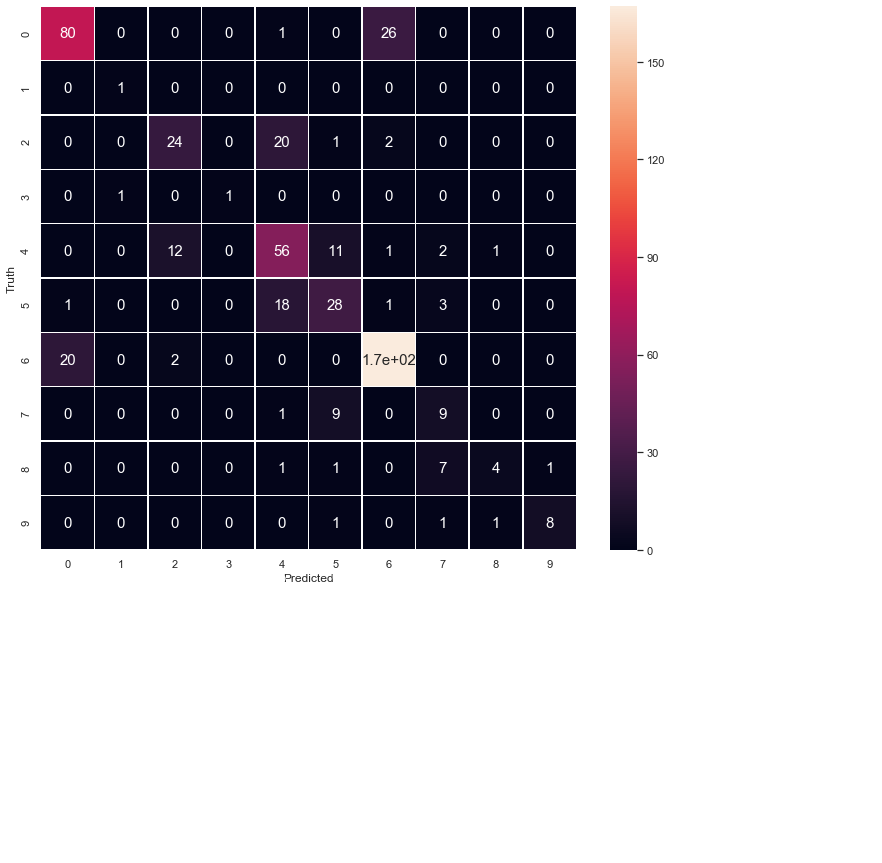

In [59]:
plt.figure(figsize = (12,10))
sns.heatmap(cm, annot = True,annot_kws={'size':15}, linewidths=.5)
plt.xlim(0, 10)
plt.ylim(10, 0)
plt.xlabel("Predicted")
plt.ylabel("Truth")